In [180]:
# import the dependencies -- Done
# Load file  -- Done

# create the main dataframes for 
    # 1) Indicator (psi)
    # 2) Death rate
    # 3) readmission rate

# check if need any cleanup -- not sure we need it yet. -- Done

# Measure/indicator is the PSI Indicator
# MB: Pick one Measure/indicator to compare between hostipals in georgia 
# MB: Pick one Measure/indicator to compare  between hostipals in VA 
# AK: Pick Measure/indicator to compare between hostipals in georgia and VA

# TF: Pick death rate compare between hostipals in georgia 
# TF: Pick death rate to compare  between hostipals in VA 
# JA: Pick death rate to compare between hostipals in georgia and VA


# GF: Pick readmission rate to compare between hostipals in georgia 
# GF: Pick readmision rate  to compare  between hostipals in VA 
# JA: Pick readmission rate to compare between hostipals in georgia and VA


# crete the visualization 


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# filename: # VA_OutcomesMeasures_October2016_CMS_Submission
filepath = "data/VA_OutcomesMeasures_October2016_CMS_Submission.xlsx"


In [181]:
main_psi_df = pd.read_excel(filepath, sheet_name="PSI")
# main_psi_df.head()
main_dr_df = pd.read_excel(filepath, sheet_name="Death Rates")
# main_dr_df.head()
main_rr_df = pd.read_excel(filepath, sheet_name="Readmission Rate")
# main_rr_df.head()

In [319]:
# main_psi_df
working_psi_df = main_psi_df[(main_psi_df["State"]== 'VA') |    (main_psi_df["State"]== 'GA')]
# working_psi_df.head()



In [320]:
# # AK: Pick Measure/indicator to compare between hostipals in georgia and VA
# get a mean of the indicator 

In [377]:
# main_psi_df

working_psi_df = main_psi_df[(main_psi_df["State"]== 'VA') |    (main_psi_df["State"]== 'GA')]

# Data Clean up 
# 3) remove the columns values not needed.
working_psi_df  = working_psi_df[working_psi_df.Indicator!="04 - Death Among Surgical Inpatients"]


# 1) Ensure metrics are in correct data format.
working_psi_df['Observed Rate']=working_psi_df['Observed Rate'].replace({"*": 0})
working_psi_df['Expected Rate']=working_psi_df['Expected Rate'].replace({"*": 0})
working_psi_df['Risk Adjusted Rate']=working_psi_df['Risk Adjusted Rate'].replace({"*": 0})
# working_psi_df.loc[working_psi_df["Observed Rate"]== "*"].count()
# working_psi_df.loc[working_psi_df["Expected Rate"]== "*"].count()
# working_psi_df.loc[working_psi_df["Risk Adjusted Rate"]== "*"].count()

# 2) remove the columns not needed zipcode and Footnotes
working_psi_df = working_psi_df.drop(columns=["Zip\nCode","Footnotes"])
# working_psi_df = working_psi_df.drop(columns=["Zip\nCode"])
# working_psi_df = working_psi_df.drop(columns=["Footnotes"])


working_psi_df["RiskAdjPerfScor"] =working_psi_df["Risk Adjusted Rate"]  -  working_psi_df["Observed Rate"]
working_psi_df["ExpPerfScor"] =working_psi_df["Expected Rate"]  -  working_psi_df["Observed Rate"]
# working_psi_df["BestPerformanceScore"] =working_psi_df["RiskAdustementPerformanceScore"]  -  working_psi_df["ExpectedPerformanceScore"]

working_psi_df.head()

# working_psi_df.groupby(["Indicator"]).sum()



,CCN#,VHA Facility,Address,City,State,Measure,Indicator,Observed Rate,Expected Rate,Risk Adjusted Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,Date Range,RiskAdjPerfScor,ExpPerfScor
324,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,Patient Safety Indicators (PSI),03 - Pressure Ulcer,0.00,0.44,0.00,0,0.88,October 2012 – September 2015,0.00,0.44
326,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,Patient Safety Indicators (PSI),06 - Iatrogenic Pneumothorax,0.58,0.27,0.72,0.33,1.11,October 2012 – September 2015,0.14,-0.31
327,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,Patient Safety Indicators (PSI),07 - CLAB Infections,0.49,0.24,0.42,0.09,0.76,October 2012 – September 2015,-0.07,-0.25
328,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,Patient Safety Indicators (PSI),08 - Postop Hip Fracture,0.58,0.04,0.58,0.26,0.89,October 2012 – September 2015,0.00,-0.54
329,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,Patient Safety Indicators (PSI),09 - Postop Hemorrhage or Hematoma,4.90,5.80,4.35,1.57,7.13,October 2012 – September 2015,-0.55,0.90


In [378]:
ga_psi_df = working_psi_df[working_psi_df["State"]=="GA"]
# ga_psi_df.head()

va_psi_df = working_psi_df[working_psi_df["State"]=="VA"]
# va_psi_df.head()



In [379]:
# virginia faiclity 
# create the dataset for plotting using the indicator 
va_facility_psi_df = va_psi_df.groupby(["Indicator"]).sum()
va_facility_psi_df = va_facility_psi_df.reset_index()

va_psi_plot_df = va_facility_psi_df.rename(columns={
    "Observed Rate":"va_observedRate",
    "Expected Rate":"va_expRate",
    "Risk Adjusted Rate":"va_riskAdjRate",
    "RiskAdjPerfScor":"va_riskAdjPerScor",
    "ExpPerfScor":"va_expPerfScor"})
va_psi_plot_df.head(10)



,Indicator,va_observedRate,va_expRate,va_riskAdjRate,va_riskAdjPerScor,va_expPerfScor
0,03 - Pressure Ulcer,0.00,1.50,0.00,0.00,1.50
1,06 - Iatrogenic Pneumothorax,0.70,0.87,0.84,0.14,0.17
2,07 - CLAB Infections,0.68,0.81,0.62,-0.06,0.13
3,08 - Postop Hip Fracture,0.86,0.13,0.87,0.01,-0.73
4,09 - Postop Hemorrhage or Hematoma,13.56,15.97,11.67,-1.89,2.41
5,10 - Postop Physiologic and Metabolic Derangem...,3.54,2.72,2.73,-0.81,-0.82
6,11 - Postop Respiratory Failure,36.03,28.59,38.87,2.84,-7.44
7,12 - Postop Pulmonary Embolism or DVT,13.87,15.50,13.22,-0.65,1.63
8,13 - Postop Sepsis,57.55,35.78,40.89,-16.66,-21.77
9,14 - Postop Wound Dehiscence,12.19,8.80,7.91,-4.28,-3.39


In [380]:
# Georgia faiclity 
#  create the dataset for plotting using the indicator
ga_facility_psi_df = ga_psi_df.groupby(["Indicator"]).sum()
ga_facility_psi_df = ga_facility_psi_df.reset_index()

ga_psi_plot_df = ga_facility_psi_df.rename(columns={
    "Observed Rate":"ga_observedRate",
    "Expected Rate":"ga_expRate",
    "Risk Adjusted Rate":"ga_riskAdjRate",
    "RiskAdjPerfScor":"ga_riskAdjPerScor",
    "ExpPerfScor":"ga_expPerfScor"})
ga_psi_plot_df.head(10)



,Indicator,ga_observedRate,ga_expRate,ga_riskAdjRate,ga_riskAdjPerScor,ga_expPerfScor
0,03 - Pressure Ulcer,0.16,1.20,0.15,-0.01,1.04
1,06 - Iatrogenic Pneumothorax,1.01,0.71,1.19,0.18,-0.30
2,07 - CLAB Infections,0.86,0.65,0.68,-0.18,-0.21
3,08 - Postop Hip Fracture,0.58,0.13,0.58,0.00,-0.45
4,09 - Postop Hemorrhage or Hematoma,9.74,18.54,7.99,-1.75,8.80
5,10 - Postop Physiologic and Metabolic Derangem...,2.69,1.99,2.03,-0.66,-0.70
6,11 - Postop Respiratory Failure,24.32,18.22,27.31,2.99,-6.10
7,12 - Postop Pulmonary Embolism or DVT,7.45,12.88,8.32,0.87,5.43
8,13 - Postop Sepsis,54.33,22.25,45.93,-8.40,-32.08
9,14 - Postop Wound Dehiscence,0.00,4.80,0.00,0.00,4.80


In [412]:
# ga_psi_plot_df
# va_psi_plot_df

psi_frames=[ga_psi_plot_df,va_psi_plot_df]

psi_plot_df=pd.concat([ga_psi_plot_df,va_psi_plot_df],axis=1,join="inner")

# psi_plot_df = psi_plot_df.reset_index()

psi_plot_df.head()

,Indicator,ga_observedRate,ga_expRate,ga_riskAdjRate,ga_riskAdjPerScor,ga_expPerfScor,Indicator,va_observedRate,va_expRate,va_riskAdjRate,va_riskAdjPerScor,va_expPerfScor
0,03 - Pressure Ulcer,0.16,1.20,0.15,-0.01,1.04,03 - Pressure Ulcer,0.00,1.50,0.00,0.00,1.50
1,06 - Iatrogenic Pneumothorax,1.01,0.71,1.19,0.18,-0.30,06 - Iatrogenic Pneumothorax,0.70,0.87,0.84,0.14,0.17
2,07 - CLAB Infections,0.86,0.65,0.68,-0.18,-0.21,07 - CLAB Infections,0.68,0.81,0.62,-0.06,0.13
3,08 - Postop Hip Fracture,0.58,0.13,0.58,0.00,-0.45,08 - Postop Hip Fracture,0.86,0.13,0.87,0.01,-0.73
4,09 - Postop Hemorrhage or Hematoma,9.74,18.54,7.99,-1.75,8.80,09 - Postop Hemorrhage or Hematoma,13.56,15.97,11.67,-1.89,2.41


In [420]:
gaI=psi_plot_df["Indicator"]

gaO=psi_plot_df["ga_observedRate"]
gaER=psi_plot_df["ga_expRate"]
# print(gaER)
gaRAR=psi_plot_df["ga_riskAdjRate"]
gaRARP=psi_plot_df["ga_riskAdjPerScor"]
gaERP=psi_plot_df["ga_expPerfScor"]
        
# gaO.plot.line()
# gaER.plot.line()
# gaRAR.plot.line()
# gaRARP.plot.line()
# gaERP.plot.line()

# gaO.plot.bar()
# gaER.plot.bar()
# gaRAR.plot.bar()
# gaRARP.plot.bar()
# gaERP.plot.bar()


vaI=psi_plot_df["Indicator"]
vaO=psi_plot_df["va_observedRate"]
vaER=psi_plot_df["va_expRate"]
vaRAR=psi_plot_df["va_riskAdjRate"]
vaRARP=psi_plot_df["va_riskAdjPerScor"]
vaERP=psi_plot_df["va_expPerfScor"]


# vaO.plot.line()
# vaER.plot.line()
# vaRAR.plot.line()
# vaRARP.plot.line()
# vaERP.plot.line()

# vaO.plot.bar()
# vaER.plot.bar()
# vaRAR.plot.bar()
# vaRARP.plot.bar()
# vaERP.plot.bar()



0      1.20
1      0.71
2      0.65
3      0.13
4     18.54
5      1.99
6     18.22
7     12.88
8     22.25
9      4.80
10     3.10
Name: ga_expRate, dtype: float64


In [424]:
type(gaRARP)
# print(gaRARP)


# data={"Georgia":[gaRARP],"Virginia":[vaRARP]}

# data={"Georgia":[gaRARP].tolist(),"Virginia":[vaRARP].tolist()}

index=psi_plot_df["Indicator"]

dataframe = pd.DataFrame(data=data,index=index)
# dataframe.head(10)
# dataframe.plot.bar(rot=90,title="something")
# plt.show(block=True)


In [419]:
x=ga_facility_psi_df["Indicator"]
y=ga_facility_psi_df["Observed Rate"]
x1=va_facility_psi_df["Indicator"]
y1=va_facility_psi_df["Observed Rate"]

# type(y)
# print(y)


0      0.16
1      1.01
2      0.86
3      0.58
4      9.74
5      2.69
6     24.32
7      7.45
8     54.33
9      0.00
10     2.00
Name: Observed Rate, dtype: float64


<BarContainer object of 11 artists>

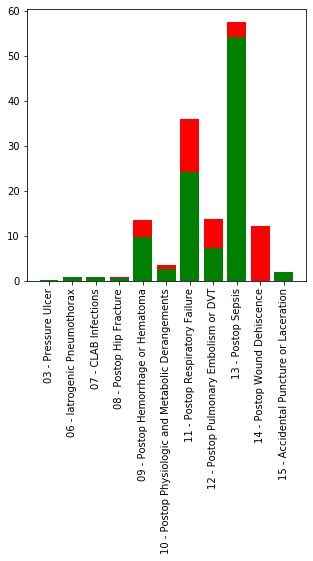

In [414]:
# workign 1 

x=ga_facility_psi_df["Indicator"]
# type(x)
y=ga_facility_psi_df["Observed Rate"]
x1=va_facility_psi_df["Indicator"]
y1=va_facility_psi_df["Observed Rate"]


tick_labels=va_facility_psi_df["Indicator"]
plt.figure(figsize=[5,5])
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.legend( loc='upper left')
plt.xticks(rotation=90)
plt.plot(legend=True)

plt.bar(x1,y1,color="red",label='Georgia',tick_label=tick_labels)
plt.bar(x,y,color="green",label='Virginia',tick_label=tick_labels)

# plt.plot(stacked=False)
# plt.show()

# axes = df.plot.bar(rot=0, subplots=True)
# axes[1].legend(loc=2)  


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 11 Text xticklabel objects>)

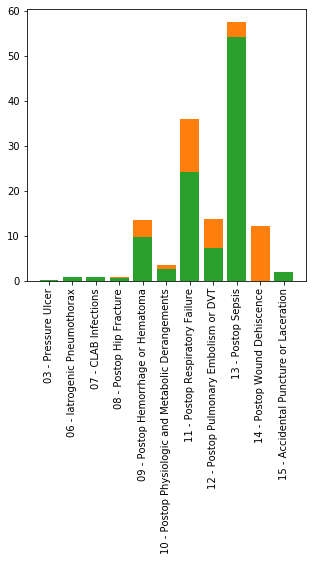

In [354]:
# plt.bar(ga_facility_psi_df)
# ga_facility_psi_df.plot.bar()
# va_facility_psi_df.plot.bar()
# ga_psi_df['Observed Rate']=ga_psi_df['Observed Rate'].replace({"*": 0})
# va_psi_df['Observed Rate']=va_psi_df['Observed Rate'].replace({"*": 0})
#  .loc[row_indexer,col_indexer] = value instead

x=ga_facility_psi_df["Indicator"]
y=ga_facility_psi_df["Observed Rate"]
x1=va_facility_psi_df["Indicator"]
y1=va_facility_psi_df["Observed Rate"]

# print(x)
# print(y)
# figure_layout = {
#     'width': '600px',
#     'height': '400px',
#     'border': '1px solid black',
#     'padding': '2px'
# }

tick_labels=va_facility_psi_df["Indicator"]
# print (tick_labels)
plt.figure(figsize=[5,5])
plt.bar(x,y,tick_label=tick_labels)
plt.bar(x1,y1)
plt.bar(x,y)
# plt
# plt.plot(x,y)
plt.xticks(rotation=90)
# plt.plot()
# [6.4, 4.8]
# plt.show()

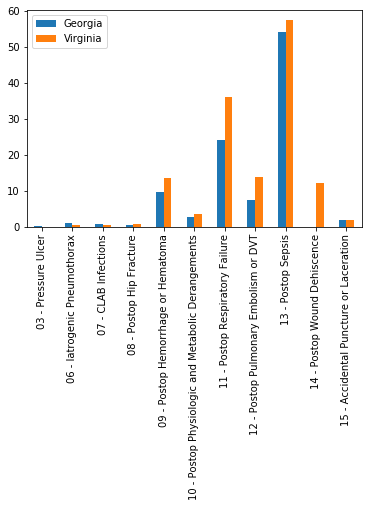

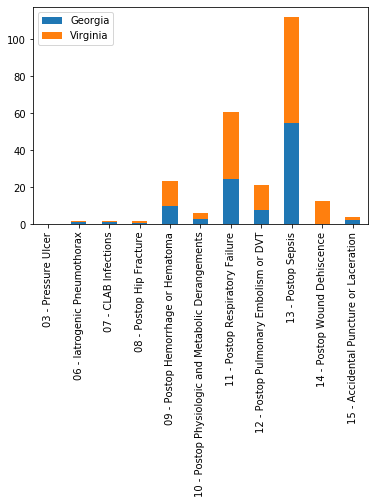

In [431]:
Georgia = ga_facility_psi_df["Observed Rate"].tolist()
Virginia = va_facility_psi_df["Observed Rate"].tolist()
index = ga_facility_psi_df["Indicator"].tolist()

df = pd.DataFrame({'Georgia': Georgia,
                   'Virginia': Virginia}, index=index)
ax = df.plot.bar(rot=90)
ax = df.plot.bar(stacked=True)




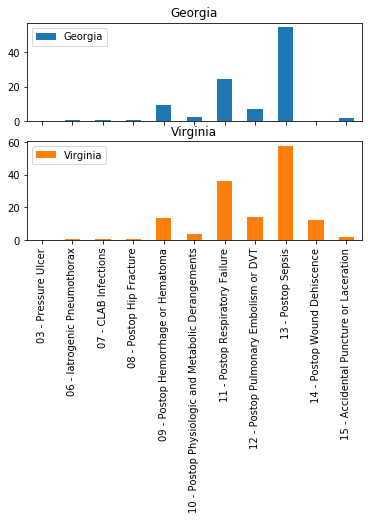

In [433]:
axes = df.plot.bar(rot=90, subplots=True)
axes[1].legend(loc=2) 